# Đề tài: Nghiên cứu mô hình gợi ý Đi chung xe dựa vào học máy

Nghiên cứu mô hình gợi ý đi chung xe sử dụng thuật toán Học máy để đề xuất người đi cùng chuyến đi dựa trên đặc điểm của người dùng và Ngưỡng thời gian người dùng(UTT)

# 1. Necessary imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn import svm
import numpy as np
import itertools
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
plt.style.use('seaborn-poster')
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 2. Load data from CSV File

In [2]:
data = pd.read_csv('./data_given.csv')

In [3]:
data

,Chatty,Safety,Punctuality,Friendliness,Comfortability,UTT,Class_Given
0,0.0,0.0,3.0,0.0,4.0,15.0,Chatty
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,3.0,4.0,2.0,5.0,20.0,Safety
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,3.0,5.0,1.0,0.0,20.0,Comfortability
...,...,...,...,...,...,...,...
39994,4.0,4.0,1.0,2.0,1.0,20.0,NaN
39995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39996,2.0,1.0,5.0,0.0,0.0,25.0,NaN
39997,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
drop_DF = data.dropna()
drop_DF

,Chatty,Safety,Punctuality,Friendliness,Comfortability,UTT,Class_Given
0,0.0,0.0,3.0,0.0,4.0,15.0,Chatty
2,2.0,3.0,4.0,2.0,5.0,20.0,Safety
4,3.0,3.0,5.0,1.0,0.0,20.0,Comfortability
6,2.0,5.0,3.0,3.0,3.0,10.0,Comfortability
8,5.0,4.0,3.0,3.0,5.0,30.0,Comfortability
...,...,...,...,...,...,...,...
36742,2.0,2.0,5.0,4.0,5.0,10.0,Chatty
36744,3.0,1.0,1.0,1.0,4.0,10.0,Chatty
36746,4.0,5.0,1.0,3.0,5.0,20.0,Chatty
36748,1.0,0.0,1.0,0.0,0.0,30.0,Chatty


In [5]:
drop_DF

,Chatty,Safety,Punctuality,Friendliness,Comfortability,UTT,Class_Given
0,0.0,0.0,3.0,0.0,4.0,15.0,Chatty
2,2.0,3.0,4.0,2.0,5.0,20.0,Safety
4,3.0,3.0,5.0,1.0,0.0,20.0,Comfortability
6,2.0,5.0,3.0,3.0,3.0,10.0,Comfortability
8,5.0,4.0,3.0,3.0,5.0,30.0,Comfortability
...,...,...,...,...,...,...,...
36742,2.0,2.0,5.0,4.0,5.0,10.0,Chatty
36744,3.0,1.0,1.0,1.0,4.0,10.0,Chatty
36746,4.0,5.0,1.0,3.0,5.0,20.0,Chatty
36748,1.0,0.0,1.0,0.0,0.0,30.0,Chatty


# 3. Distribution of the classes

<AxesSubplot:xlabel='Punctuality', ylabel='Friendliness'>

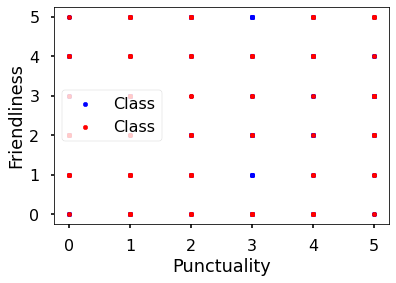

In [6]:
chatty_df = drop_DF[drop_DF['Class_Given']== 'Chatty'][0:200]
safety_df = drop_DF[drop_DF['Class_Given']== 'Safety'][0:200]
punctuality_df = drop_DF[drop_DF['Class_Given']== 'Punctuality'][0:200]
friendliness_df = drop_DF[drop_DF['Class_Given']== 'Friendliness'][0:200]
comfortability_df = drop_DF[drop_DF['Class_Given']== 'Comfortability'][0:200]

axes = chatty_df.plot(kind='scatter', x='Punctuality', y='Friendliness', color='blue',label='Class')
safety_df.plot(kind='scatter', x='Punctuality', y='Friendliness', color='red',label='Class', ax=axes)


In [7]:
count_chatty = 0
count_safety = 0
count_punctuality = 0
count_friendliness = 0
count_comfortability = 0
for i in drop_DF['Class_Given']:
  if i == "Chatty":
    count_chatty = count_chatty + 1
  if i == "Safety":
    count_safety = count_safety + 1
  if i == "Punctuality":
    count_punctuality = count_punctuality + 1
  if i == "Friendliness":
    count_friendliness = count_friendliness + 1
  if i == "Comfortability":
    count_comfortability = count_comfortability + 1
print(count_chatty)
print(count_safety)
print(count_punctuality)
print(count_friendliness)
print(count_comfortability)

16244
92
928
816
296


# 4. Remove unwanted columns

In [8]:
drop_DF.columns

feature_df = drop_DF[['Chatty', 'Safety', 'Punctuality', 'Friendliness', 'Comfortability',
       'UTT']]
X = np.asarray(feature_df)
y = np.asarray(drop_DF['Class_Given'])

In [9]:
X[0:5]

array([[ 0.,  0.,  3.,  0.,  4., 15.],
       [ 2.,  3.,  4.,  2.,  5., 20.],
       [ 3.,  3.,  5.,  1.,  0., 20.],
       [ 2.,  5.,  3.,  3.,  3., 10.],
       [ 5.,  4.,  3.,  3.,  5., 30.]])

In [10]:
y[0:5]

array(['Chatty', 'Safety', 'Comfortability', 'Comfortability',
       'Comfortability'], dtype=object)

# 5. Divide the data as Train/Test dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# 14700 x 6
X_train.shape

# 14700 x 1
y_train.shape

# 3676 x 6
X_test.shape

# 3676 x 1
y_test.shape

(3676,)

# 6. Modeling (SVM with Scikit-learn)

In [12]:
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [13]:
y_predict = classifier.predict(X_test)

In [14]:
y_predict

array(['Chatty', 'Chatty', 'Chatty', ..., 'Chatty', 'Chatty', 'Chatty'],
      dtype=object)

In [15]:
count = 0
for i in y_predict:
  if i == "Chatty":
    count = count + 1
print(count)

3676


# 7. Result

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

                precision    recall  f1-score   support

        Chatty       0.88      1.00      0.93      3221
Comfortability       0.00      0.00      0.00        61
  Friendliness       0.00      0.00      0.00       185
   Punctuality       0.00      0.00      0.00       197
        Safety       0.00      0.00      0.00        12

      accuracy                           0.88      3676
     macro avg       0.18      0.20      0.19      3676
  weighted avg       0.77      0.88      0.82      3676



c:\users\ltduo\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ltduo\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ltduo\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo